In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [68]:
url = "data/tablaOrinaFlav.csv"
datos = pd.read_csv(url, encoding="unicode_escape", index_col=[0])
datos.head()

,numVol,Endulzante,X,EG,ES,HE.G,NG,NS,Tiempo,Peso.inicial,...,Delta.Grasa,IRCV.inicial,IRCV.Final,Bpmin.inicial,Bpmax.inicial,Bpmin.final,Bpmax.final,Frec.inicial,Frec.final,Sexo
1,1,ST,1 A0,13.679368,0.083526,7.174852,44.516499,6.049078,0,75.2,...,-3.7,8,7,86,137,85,120,70,98,MUJER
4,3,ST,3 A0,27.096693,0.060181,0.315785,30.279825,5.972404,0,80.4,...,-2.4,11,7,75,107,78,104,64,65,MUJER
12,9,ST,9 A0,80.113298,0.039980,0.000026,11.413849,4.744569,0,64.7,...,-1.0,9,9,76,107,69,102,74,69,MUJER
15,10,ST,10 A0,11.792109,0.020568,0.569949,3.248316,1.960048,0,91.3,...,-1.1,10,10,88,150,91,158,80,72,MUJER
21,14,ST,14 A0,2.053593,0.090621,0.666540,22.933157,37.012139,0,73.2,...,-2.2,8,8,93,134,80,120,80,81,MUJER


In [74]:
X_scaled = datos.drop(columns=(["numVol", "Endulzante", "X","Tiempo", "Sexo"])).to_numpy()




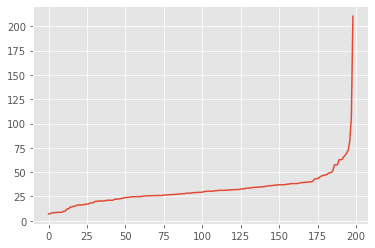

In [75]:
neigh = NearestNeighbors(n_neighbors=2)

nbrs= neigh.fit(X_scaled)

distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [79]:
modelo_dbscan = DBSCAN(
                eps=50,
                min_samples = 5,
                metric= "euclidean"
)

modelo_dbscan.fit(X=X_scaled)

DBSCAN(eps=50)

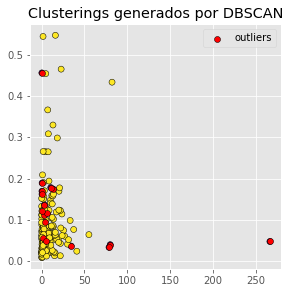

In [80]:
# Clasificación
# ==============================================================================
labels = modelo_dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = labels,
    marker    = 'o',
    edgecolor = 'black'
)

# Los outliers se identifican con el label -1
ax.scatter(
    x = X[labels == -1, 0],
    y = X[labels == -1, 1], 
    c = 'red',
    marker    = 'o',
    edgecolor = 'black',
    label = 'outliers'
)

ax.legend()
ax.set_title('Clusterings generados por DBSCAN');

In [81]:
# Número de clusters y observaciones "outliers"
# ==============================================================================
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = list(labels).count(-1)

print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_noise}')

Número de clusters encontrados: 1
Número de outliers encontrados: 17
